In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lab 5 - testing our flexible microelectrode performance after 9 weeks of static aging at 87 degrees celsius

#### 1. EIS Analysis: Plot Electrochemical Impedance Spectroscopy impedance and phase from 1 Hz to 100 kHz. Discuss the observed changes and possible causes.

In [2]:
eis_c1_2 = pd.read_csv('data/Small device 2 Ch 1 eis Day x.txt', 
                     skiprows=17, delimiter=",")
eis_c2_2 = pd.read_csv('data/Small device 2 Ch 2 eis Day x.txt', 
                     skiprows=17, delimiter=",")
eis_c3_2 = pd.read_csv('data/Small device 2 Ch 3 eis Day x.txt',
                     skiprows=17, delimiter=",")
eis_c4_2 = pd.read_csv('data/Small device 2 Ch 4 eis Day x.txt',
                     skiprows=17, delimiter=",")
eis_c1 = pd.read_csv('../lab-1/data/Small device 2 Ch 1 eis Day 0.txt', 
                     skiprows=17, delimiter=",")
eis_c2 = pd.read_csv('../lab-1/data/Small device 2 Ch 2 eis Day 0.txt', 
                     skiprows=17, delimiter=",")
eis_c3 = pd.read_csv('../lab-1/data/Small device 2 Ch 3 eis Day 0.txt',
                     skiprows=17, delimiter=",")
eis_c4 = pd.read_csv('../lab-1/data/Small device 2 Ch 4 eis Day 0.txt',
                     skiprows=17, delimiter=",")
channels = [eis_c1, eis_c2, eis_c3, eis_c4]
channels_2 = [eis_c1_2, eis_c2_2, eis_c3_2, eis_c4_2]
titles = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']

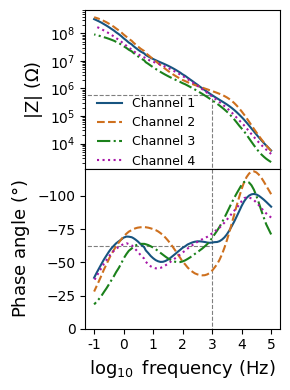

In [3]:
titles = ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4']
fig, axs = plt.subplots(2, 1, figsize=(3, 4), sharex=True,
                        gridspec_kw={'hspace': 0})
colors = ["#175480", "#ce701e", "#1b811b", "#a716a7"] 
linestyles = ['-', '--', '-.', ':']

for df, title, color, ls in zip(channels, titles, colors, linestyles):
    axs[0].loglog(df['Freq/Hz'], df[' Z/ohm'], label=title, color=color, linestyle=ls)
axs[0].set_ylabel(r'|Z| ($\Omega$)', fontsize=13)
# axs[0].set_title('Day x', fontsize=11)
axs[0].legend(frameon=False, loc='lower left', fontsize=9, bbox_to_anchor=(0, -0.06))
# axs[0].grid(True, which='both', ls='--', lw=0.5)

for df, title, color, ls in zip(channels, titles, colors, linestyles):
    axs[1].semilogx(df['Freq/Hz'], df[' Phase/deg'], label=title, color=color, linestyle=ls)
axs[1].set_xlabel(r'$\log_{10}$ frequency (Hz)', fontsize=13)
axs[1].set_ylabel(r'Phase angle ($\degree$)', fontsize=13)
axs[1].set_xticks([0.1, 1, 10, 1e2, 1e3, 1e4, 1e5])
axs[1].set_xticklabels([-1, 0, 1, 2, 3, 4,  5])

axs[0].plot([1e3, 1e3], [0, 5.6e5], 'k--', lw=0.8, zorder=-3, alpha = 0.5)
axs[0].plot([0, 1e3], [5.6e5, 5.6e5], 'k--', lw=0.8, zorder=-3, alpha = 0.5)
axs[1].set_ylim([0, -120])
axs[1].plot([1e3, 1e3], [-120, 0], 'k--', lw=0.8, zorder=-3, alpha = 0.5)
axs[1].plot([0, 1e3], [-62.5, -62.5], 'k--', lw=0.8, zorder=-3, alpha = 0.5)
plt.tight_layout()
plt.show()
# fig.savefig('figs/eis_plot_day1.pdf', dpi=300)

In [4]:
# calcuate the avg impedence at 1kHz
impedances = []
for df in channels:
    idx_1kHz = (np.abs(df['Freq/Hz'] - 1e3)).idxmin()
    impedances.append(df[' Z/ohm'][idx_1kHz])

print("Mean Impedance at 1 kHz day 1:", np.mean(impedances))

impedances = []
for df in channels_2:
    idx_1kHz = (np.abs(df['Freq/Hz'] - 1e3)).idxmin()
    impedances.append(df[' Z/ohm'][idx_1kHz])

print("Mean Impedance at 1 kHz day x:", np.mean(impedances))

phases = []
for df in channels:
    idx_1kHz = (np.abs(df['Freq/Hz'] - 1e3)).idxmin()
    phases.append(df[' Phase/deg'][idx_1kHz])
print("Mean Phase at 1 kHz day 1:", np.mean(phases))

phases = []
for df in channels_2:
    idx_1kHz = (np.abs(df['Freq/Hz'] - 1e3)).idxmin()
    phases.append(df[' Phase/deg'][idx_1kHz])
print("Mean Phase at 1 kHz day x:", np.mean(phases))

Mean Impedance at 1 kHz day 1: 564050.0
Mean Impedance at 1 kHz day x: 302450.0
Mean Phase at 1 kHz day 1: -62.25000000000001
Mean Phase at 1 kHz day x: -56.15


#### 2. CV Analysis: Plot Cyclic Voltammetry at sweep rates of 10–100 mV/s within a potential window of –0.6 V to +0.8 V. Discuss the observed changes and possible causes.

In [5]:
# read in data
cv_c1 = pd.read_csv('../lab-1/data/Small device 2 Ch 1 CV Day 0.txt', 
                     skiprows=40, delimiter=",")
cv_c2 = pd.read_csv('../lab-1/data/Small device 2 Ch 2 CV Day 0.txt', 
                     skiprows=40, delimiter=",")
cv_c3 = pd.read_csv('../lab-1/data/Small device 2 Ch 3 CV Day 0.txt',
                     skiprows=40, delimiter=",")
cv_c4 = pd.read_csv('../lab-1/data/Small device 2 Ch 4 CV Day 0.txt',
                     skiprows=40, delimiter=",")
channels_cv = [cv_c1, cv_c2, cv_c3, cv_c4]
# read in data
cv_c1_2 = pd.read_csv('data/Small device 2 Ch 1 CV Day x.txt', 
                     skiprows=40, delimiter=",")
cv_c2_2 = pd.read_csv('data/Small device 2 Ch 2 CV Day x.txt', 
                     skiprows=40, delimiter=",")
cv_c3_2 = pd.read_csv('data/Small device 2 Ch 3 CV Day x.txt',
                     skiprows=40, delimiter=",")
cv_c4_2 = pd.read_csv('data/Small device 2 Ch 4 CV Day x.txt',
                     skiprows=40, delimiter=",")
channels_cv_2 = [cv_c1_2, cv_c2_2, cv_c3_2, cv_c4_2]

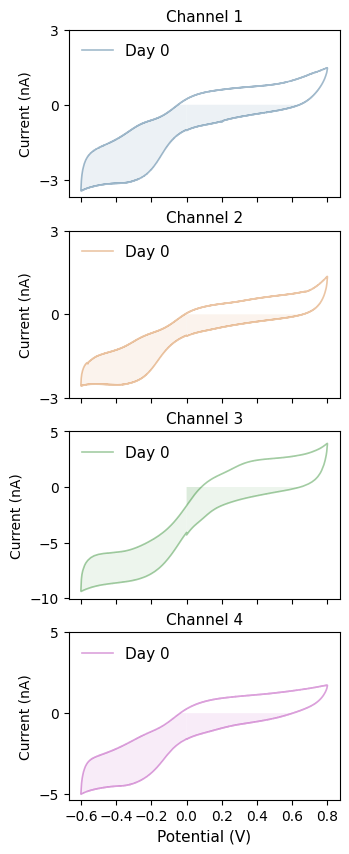

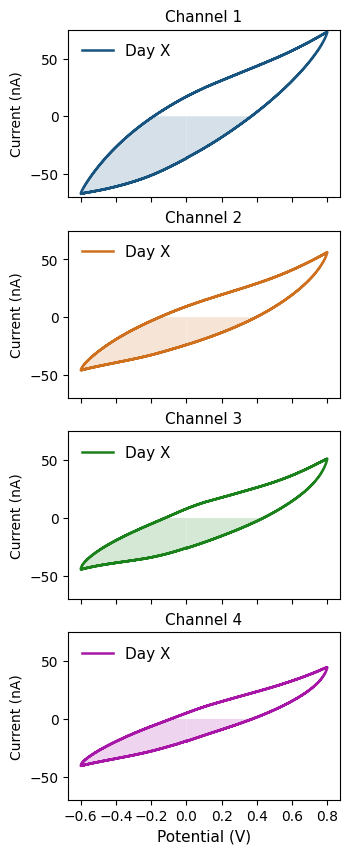

In [6]:
fig, axs = plt.subplots(4, 1, figsize=(3.5, 10), sharex=True)
for i, (df1, title, color) in enumerate(zip(channels_cv, titles, colors)):
    ax = axs[i]
    x1 = df1['Potential/V'].iloc[-2800:].to_numpy()
    y1 = (df1[' Current/A'].iloc[-2800:] * 1e9).to_numpy()
    ax.plot(x1, y1, label='Day 0', color=color, linewidth=1.2, alpha=0.4)
    m1 = y1 < 0
    ax.fill_between(x1, 0, y1, where=m1, facecolor=color, alpha=0.08, linewidth=0)
    ax.set_title(title, fontsize=11)
    ax.set_ylabel('Current (nA)', fontsize=10)
    if i == len(channels_cv) - 1:
        ax.set_xlabel('Potential (V)', fontsize=11)
        ax.set_xticks(np.arange(-0.6, 0.81, 0.2))
    if i == 2:
        ax.set_yticks([-10, -5, 0, 5])
    elif i ==3:
        ax.set_yticks([-5, 0, 5])
    else:
        ax.set_yticks([-3, 0, 3])
    ax.legend(frameon=False, fontsize=11, loc = 'upper left')

# fig.savefig('figs/cv_plot_day1.pdf', dpi=300, bbox_inches='tight')

fig, axs = plt.subplots(4, 1, figsize=(3.5, 10), sharex=True)
for i, (df2, title, color) in enumerate(zip(channels_cv_2, titles, colors)):
    ax = axs[i]
    x2 = df2['Potential/V'].iloc[-2800:].to_numpy()
    y2 = (df2[' Current/A'].iloc[-2800:] * 1e9).to_numpy()
    ax.plot(x2, y2, label='Day X', color=color, linewidth=1.8)
    m2 = y2 < 0
    ax.fill_between(x2, 0, y2, where=m2, facecolor=color, alpha=0.18, linewidth=0)
    ax.set_title(title, fontsize=11)
    ax.set_ylabel('Current (nA)', fontsize=10)
    if i == len(channels_cv) - 1:
        ax.set_xlabel('Potential (V)', fontsize=11)
        ax.set_xticks(np.arange(-0.6, 0.81, 0.2))
    ax.set_yticks([-50, 0, 50])
    ax.set_ylim([-70, 75])
    ax.legend(frameon=False, fontsize=11, loc='upper left')

# fig.savefig('figs/cv_plot_dayx.pdf', dpi=300, bbox_inches='tight')

#### 3. CSC Calculation: Calculate the Charge Storage Capacity based on CV integration.

In [7]:
diameter_um = 28  # micron, given
area_cm2 = np.pi * ((diameter_um * 1e-4) / 2)**2
scan_rate = 0.1 # V/s, from header

def csc_c(df, area_cm2, v_low=-0.6, v_high=0.8, nu=0.1):
    E = df['Potential/V'].to_numpy()
    J = (df[' Current/A'].to_numpy()) / area_cm2  # A/cm²
    dec = np.diff(E) < 0
    brk = np.where(np.diff(dec.astype(int)) != 0)[0] + 1
    runs = np.split(np.arange(len(E)), brk)
    cath_runs = [r for r in runs if len(r) > 1 and np.all(np.diff(E[r]) < 0)]
    if not cath_runs:
        return np.nan
    r = cath_runs[-1]  # last full descending leg

    m = (E[r] >= v_low) & (E[r] <= v_high)
    e = E[r][m]; j = J[r][m]
    if len(e) < 2:
        return np.nan

    dE = np.abs(np.diff(e))
    j_cath = np.maximum(-j[1:], 0.0)  # cathodic magnitude 
    q_c = (j_cath * (dE / nu)).sum()  # C
    return 1e3 * q_c                  # mC

In [28]:

# print delta between day 0 and day x
for i, (df1, df2) in enumerate(zip(channels_cv, channels_cv_2), 1):
    csc_day0 = csc_c(df1, area_cm2, -0.6, 0.8, scan_rate)
    csc_dayx = csc_c(df2, area_cm2, -0.6, 0.8, scan_rate)
    delta = csc_dayx - csc_day0
    ratio = csc_dayx / csc_day0 

    print(f"Delta CSC_c {i}: {delta:.3f} mC/cm^2")
    print(f"Ratio CSC_c {i}: {ratio:.3f}")
    print("---------")
    print(f" {i} : {csc_dayx}")

Delta CSC_c 1: 10.922 mC/cm^2
Ratio CSC_c 1: 22.423
---------
 1 : 11.431390689422372
Delta CSC_c 2: 7.939 mC/cm^2
Ratio CSC_c 2: 22.141
---------
 2 : 8.31494070461495
Delta CSC_c 3: 8.449 mC/cm^2
Ratio CSC_c 3: 6.829
---------
 3 : 9.898441101651231
Delta CSC_c 4: 5.234 mC/cm^2
Ratio CSC_c 4: 8.189
---------
 4 : 5.9624279505284985


#### 4. VT Analysis: Plot Voltage Transients measured during current pulse stimulation (e.g., 1000 µs pulse width). Discuss the observed changes and possible causes.

In [9]:
# read in CIC data 
cic_c1 = pd.read_csv('../lab-1/data/Small device 2 Ch 1 CIC Day 0.txt', 
                     skiprows=19, delimiter=",")
cic_c2 = pd.read_csv('../lab-1/data/Small device 2 Ch 2 CIC Day 0.txt',
                        skiprows=19, delimiter=",")
cic_c3 = pd.read_csv('../lab-1/data/Small device 2 Ch 3 CIC Day 0.txt',
                        skiprows=19, delimiter=",")
cic_c4 = pd.read_csv('../lab-1/data/Small device 2 Ch 4 CIC Day 0.txt',
                        skiprows=19, delimiter=",")
channels_cic = [cic_c1, cic_c2, cic_c3, cic_c4]

cic_c1_2 = pd.read_csv('data/Small device 2 Ch 1 CIC Day x.txt', 
                     skiprows=19, delimiter=",")
cic_c2_2 = pd.read_csv('data/Small device 2 Ch 2 CIC Day x.txt',
                        skiprows=19, delimiter=",")
cic_c3_2 = pd.read_csv('data/Small device 2 Ch 3 CIC Day x.txt',
                        skiprows=19, delimiter=",")
cic_c4_2 = pd.read_csv('data/Small device 2 Ch 4 CIC Day x.txt',
                        skiprows=19, delimiter=",")
channels_cic_2 = [cic_c1_2, cic_c2_2, cic_c3_2, cic_c4_2]


In [10]:
def extract_segment(dfs, col_time='Time/sec', col_v=' Potential/V'):
    seg_times = []
    seg_volts = []
    for d in dfs:
        t = d[col_time].iloc[31000:31600].to_numpy()
        v = d[col_v].iloc[31000:31600].to_numpy()
        seg_times.append(t)
        seg_volts.append(v)
    # assume equal sampling; use first time vector
    T = seg_times[0]
    V = np.vstack(seg_volts)            # shape (n_channels, n_points)
    return T, V

t0, V0 = extract_segment(channels_cic)
avg0 = V0.mean(axis=0)
std0 = V0.std(axis=0)
tX, VX = extract_segment(channels_cic_2)
avgX = VX.mean(axis=0)
stdX = VX.std(axis=0)

C:\Users\momun\AppData\Local\Temp\ipykernel_33484\2954195171.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels([0, 0, 1, 2, 3, 4, 5])


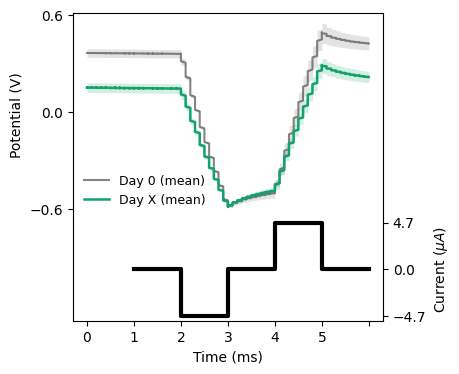

In [11]:
# Averaged VT (CIC) transient: Day 0 vs Day X
start = 31_100
end   = 31_600

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4,4), sharex=True,
                               gridspec_kw={'height_ratios':[2,1], 'hspace':0})

ax1.plot(t0*1e3, avg0, color='#444444', lw=1.5, label='Day 0 (mean)', alpha=0.65)
ax1.fill_between(t0*1e3, avg0-std0, avg0+std0, color='#444444', alpha=0.15, lw=0)

ax1.plot(tX*1e3, avgX, color="#11a369", lw=1.8, label='Day X (mean)')
ax1.fill_between(tX*1e3, avgX-stdX, avgX+stdX, color="#11a3697e", alpha=0.18, lw=0)

ax1.set_ylabel('Potential (V)')
ax1.set_yticks([-0.6, 0, 0.6])
ax1.legend(frameon=False, fontsize=9)
ax1.spines['bottom'].set_visible(False)

t = np.array([311, 312, 313, 314, 315, 316])  # ms
I = np.array([0, -4.7, 0, 4.7, 0, 0]) # example
ax2.step(t, I, where='post', color='k', linewidth=3)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel(r'Current ($\mu A$)')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
# ax2.set_ylim(-8.3, 8.3)
ax2.set_yticks([-4.7, 0, 4.7])
# ax2.set_xticks([0, 100, 200, 300, 400, 500, 600])
ax2.set_xticklabels([0, 0, 1, 2, 3, 4, 5])
ax2.spines['top'].set_visible(False)
plt.show()

# fig.savefig('figs/cic_transient_dayx.pdf', dpi=300, bbox_inches='tight')

In [12]:
time_ms = cic_c1['Time/sec'][:1300] * 1e3
voltage1 = cic_c1[' Potential/V'][1400*20:1400*20 + 1300]
voltage2 = cic_c2[' Potential/V'][1400*20:1400*20 + 1300]
voltage3 = cic_c3[' Potential/V'][1400*20:1400*20 + 1300]
voltage4 = cic_c4[' Potential/V'][1400*20:1400*20 + 1300]

voltage1_2 = cic_c1_2[' Potential/V'][1400*20:1400*20 + 1300]
voltage2_2 = cic_c2_2[' Potential/V'][1400*20:1400*20 + 1300]
voltage3_2 = cic_c3_2[' Potential/V'][1400*20:1400*20 + 1300]
voltage4_2 = cic_c4_2[' Potential/V'][1400*20:1400*20 + 1300]

def analyze_voltage_drop(voltage):
    cathodic_start = voltage[1400*20]  # Baseline
    cathodic_peak = np.min(voltage[:1400*20 + 100])  # Most negative point
    total_delta_E = abs(cathodic_peak - cathodic_start)
    return cathodic_start, cathodic_peak, total_delta_E


voltages = [voltage1, voltage2, voltage3, voltage4]
voltages_2 = [voltage1_2, voltage2_2, voltage3_2, voltage4_2]


In [13]:
results = []
for i, voltage in enumerate(voltages, 1):
    cathodic_start, cathodic_peak, total_delta_E = analyze_voltage_drop(voltage)
    results.append((cathodic_start, cathodic_peak, total_delta_E))
    
    # print(f"\nChannel {i}:")
    # print(f"  Baseline voltage: {cathodic_start:.3f} V")
    # print(f"  Peak cathodic voltage: {cathodic_peak:.3f} V")
    # print(f"  Total ΔE (entire drop): {total_delta_E:.3f} V")

baselines = [result[0] for result in results]
peaks = [result[1] for result in results]
delta_Es = [result[2] for result in results]


print(f"\n{'='*40}")
print("day MEAN RESULTS ACROSS 4 ELECTRODES:")
print(f"{'='*40}")
print(f"Mean baseline voltage: {np.mean(baselines):.3f} ± {np.std(baselines):.3f} V")
print(f"Mean peak cathodic voltage: {np.mean(peaks):.3f} ± {np.std(peaks):.3f} V")
print(f"Mean total ΔE: {np.mean(delta_Es):.3f} ± {np.std(delta_Es):.3f} V")
results_2 = []
for i, voltage in enumerate(voltages_2, 1):
    cathodic_start, cathodic_peak, total_delta_E = analyze_voltage_drop(voltage)
    results_2.append((cathodic_start, cathodic_peak, total_delta_E))
    
    # print(f"\nChannel {i}:")
    # print(f"  Baseline voltage: {cathodic_start:.3f} V")
    # print(f"  Peak cathodic voltage: {cathodic_peak:.3f} V")
    # print(f"  Total ΔE (entire drop): {total_delta_E:.3f} V")

baselines_2 = [result[0] for result in results_2]
peaks_2 = [result[1] for result in results_2]
delta_Es_2 = [result[2] for result in results_2]

print(f"\n{'='*40}")
print("day x MEAN RESULTS ACROSS 4 ELECTRODES:")
print(f"{'='*40}")
print(f"Mean baseline voltage: {np.mean(baselines_2):.3f} ± {np.std(baselines_2):.3f} V")
print(f"Mean peak cathodic voltage: {np.mean(peaks_2):.3f} ± {np.std(peaks_2):.3f} V")
print(f"Mean total ΔE: {np.mean(delta_Es_2):.3f} ± {np.std(delta_Es_2):.3f} V")


day MEAN RESULTS ACROSS 4 ELECTRODES:
Mean baseline voltage: 0.383 ± 0.030 V
Mean peak cathodic voltage: -0.589 ± 0.011 V
Mean total ΔE: 0.971 ± 0.034 V

day x MEAN RESULTS ACROSS 4 ELECTRODES:
Mean baseline voltage: 0.173 ± 0.029 V
Mean peak cathodic voltage: -0.584 ± 0.010 V
Mean total ΔE: 0.757 ± 0.027 V


#### 5. CIC Calculation: Calculate the Charge Injection Capacity derived from VT data.

In [14]:
current_c1 = 4.7e-6  # Amps, from header of CIC data
current_c2 = 4.6e-6
current_c3 = 6e-6
current_c4 = 5e-6

pulse_width = 0.001 #sec

capacity_c1 = current_c1 * pulse_width / area_cm2 * 1000  # mC/cm^2
capacity_c2 = current_c2 * pulse_width / area_cm2 * 1000  
capacity_c3 = current_c3 * pulse_width / area_cm2 * 1000  
capacity_c4 = current_c4 * pulse_width / area_cm2 * 1000  
##############day x###############
current_c1_2 = 3.8e-6  # Amps, from header of CIC data
current_c2_2 = 3.8e-6
current_c3_2 = 4.4e-6
current_c4_2 = 4.4e-6

capacity_c1_2 = current_c1_2 * pulse_width / area_cm2 * 1000  # mC/cm^2
capacity_c2_2 = current_c2_2 * pulse_width / area_cm2 * 1000  
capacity_c3_2 = current_c3_2 * pulse_width / area_cm2 * 1000  
capacity_c4_2 = current_c4_2 * pulse_width / area_cm2 * 1000 

print(f"Charge injection capactiy")
print(f"channel 1: day1 {capacity_c1:.3f} mC/cm^2, day x {capacity_c1_2:.3f}")
print(f"channel 2: day1 {capacity_c2:.3f} mC/cm^2, day x {capacity_c2_2:.3f}")
print(f"channel 3: day1 {capacity_c3:.3f} mC/cm^2, day x {capacity_c3_2:.3f}")
print(f"channel 4: day1 {capacity_c4:.3f} mC/cm^2, day x {capacity_c3_2:.3f}")
print(f"mean: {(capacity_c1 + capacity_c2 + capacity_c3 + capacity_c4_2)/4:.3f} mC/cm^2")

Charge injection capactiy
channel 1: day1 0.763 mC/cm^2, day x 0.617
channel 2: day1 0.747 mC/cm^2, day x 0.617
channel 3: day1 0.974 mC/cm^2, day x 0.715
channel 4: day1 0.812 mC/cm^2, day x 0.715
mean: 0.800 mC/cm^2


In [15]:
# difference and ratio
print(f"Delta CIC c1: {(capacity_c1_2 - capacity_c1):.3f} mC/cm^2")
print(f"Ratio CIC c1: {(capacity_c1_2 / capacity_c1):.3f} x")
print(f"Delta CIC c1: {(capacity_c2_2 - capacity_c2):.3f} mC/cm^2")
print(f"Ratio CIC c1: {(capacity_c2_2 / capacity_c2):.3f} x")
print(f"Delta CIC c1: {(capacity_c3_2 - capacity_c3):.3f} mC/cm^2")
print(f"Ratio CIC c1: {(capacity_c3_2 / capacity_c3):.3f} x")
print(f"Delta CIC c1: {(capacity_c4_2 - capacity_c4):.3f} mC/cm^2")
print(f"Ratio CIC c1: {(capacity_c4_2 / capacity_c4):.3f} x")

Delta CIC c1: -0.146 mC/cm^2
Ratio CIC c1: 0.809 x
Delta CIC c1: -0.130 mC/cm^2
Ratio CIC c1: 0.826 x
Delta CIC c1: -0.260 mC/cm^2
Ratio CIC c1: 0.733 x
Delta CIC c1: -0.097 mC/cm^2
Ratio CIC c1: 0.880 x


#### 6. Lifetime Projection: Estimate the equivalent lifetime at 37 °C (regardless of failure occurrence) using the Arrhenius equation with $Q_{10}$ values of 1.5, 2.0, and 2.5, respectively. Discuss the expected lifetime of polymer microelectrodes and the various failure causes.

$k = A e^{\frac{-E_a}{RT}}$

$Q_{10} = \frac{R_2}{R_1}^{\frac{10}{T_2 - T_1}}$

------------------------------------------------------------------------------------------------

#### 7. Bonus - Equivalent Circuit Modeling: Suggest a possible equivalent circuit model and discuss the changes in the circuit components between day 0 and day X at 87 °C, along with possible reasons for these changes.

Prior to fitting the EIS measurments to the ECM, \ref{boukamp} suggests first veriyfing that the measured signal has the capacity to be modled. The Linear Kramers-Kronig test helps to validate that the measured impedance data obeys the four following rules: (1) Causality, (2) Linearity, (3) Stability, and (4) Time-invariance. For brevity, the details of this assumptions can be found in \ref{boukarmp} and implemented in `pyEIS` open-source repository. 

We fit the data to Kramers-Kronig test and plot a representtive sample in Figure \ref{fig: kk}. It can be seen that the real and imaginary impedance $\Delta Z'$ and $\Delta Z''$, respectively, have residuals that generally stay within $\pm 3\%$, indacating a model-able measurement set. This result remained true while using  24, 48, and 150 kk elements. Note, that the included figure represents a single channel (channel 3) from Day 1, but all 4 channels from Day 1 and x present similar residual plots or better. 

The fitted ECM parameters from day 1 and x are inlcuded Table \ref{tab: ecm} in the appendix. We show the average channel values with a the bar chart in Figure \ref{fig: ecm-param} to show the aggregated differences in param values for the electrode channel heads. 

In [16]:
from scipy.optimize import least_squares

In [17]:

def ecm_Z(f, Rs, Rct, Q, n, sigma):
    w = 2*np.pi*f
    Zcpe = 1/(Q*(1j*w)**n)
    Zw   = sigma / np.sqrt(1j*w)      # semi-infinite Warburg
    Zfar = Rct + Zw                   # faradaic branch
    Zpar = (Zcpe * Zfar) / (Zcpe + Zfar)   # parallel
    return Rs + Zpar

def fit_ecm(df):
    f   = df['Freq/Hz'].to_numpy(dtype=float)
    Zr  = df[" Z'/ohm"].to_numpy(dtype=float)
    Zi  = df[' Z"/ohm'].to_numpy(dtype=float)

    # clean & sort
    mask = np.isfinite(f) & np.isfinite(Zr) & np.isfinite(Zi)
    f, Zr, Zi = f[mask], Zr[mask], Zi[mask]
    idx = np.argsort(f)
    f, Zr, Zi = f[idx], Zr[idx], Zi[idx]

    Zc = Zr + 1j * Zi

    # ---- crude initial guesses ----
    # use only points with positive real part to avoid the crazy HF artefact dominating Rs
    pos = Zr > 0
    if np.any(pos):
        f_pos  = f[pos]
        Zr_pos = Zr[pos]
        # "high-f" and "low-f" within the positive-real subset
        nh = max(3, min(10, len(Zr_pos)//2))
        Rs0   = float(np.mean(Zr_pos[-nh:]))          # high-f positive real
        Rtot0 = float(np.mean(Zr_pos[:nh]))           # low-f positive real
    else:
        # fall back to whole range if everything is negative
        nh = max(3, min(10, len(Zr)//2))
        Rs0   = float(np.mean(Zr[-nh:]))
        Rtot0 = float(np.mean(Zr[:nh]))

    Rs0  = max(Rs0, -1e3)                             # allow slight negative, not huge
    Rct0 = max(Rtot0 - Rs0, 1.0)

    # semicircle peak for time constant
    pk = np.argmax(-Zi)
    f0 = f[pk] if Zi[pk] < 0 else 10.0                # Hz, fallback if no clear peak
    C_approx = 1.0 / (2 * np.pi * Rct0 * f0)
    Q0 = np.clip(C_approx, 1e-9, 1e-3)                # start Q ~ C if n≈1
    n0 = 0.85
    sigma0 = 1.0                                      # arbitrary but reasonable scale

    p0 = np.array([Rs0, Rct0, Q0, n0, sigma0])

    # ---- bounds ----
    # Rs: allow small negative (artefacts), Rct >= 0, Q in [1e-9, 1e-1], n in [0.3, 1], sigma >= 0
    lb = np.array([-1e3, 0.0,   1e-9, 0.3, 0.0])
    ub = np.array([ 1e5, 1e10,  1e-1, 1.0, 1e6])

    p0 = np.clip(p0, lb, ub)

    def residual(p):
        Zm = ecm_Z(f, *p)
        r  = Zm - Zc
        den = np.maximum(np.abs(Zc), 1.0)  # stabilise weighting
        return np.r_[r.real / den, r.imag / den]

    res = least_squares(residual, p0, bounds=(lb, ub), method='trf')
    return res.x, res.cost


In [18]:
ecm_params = {}
for df, title in zip(channels, titles):
    p, cost = fit_ecm(df)
    ecm_params[title] = (p, cost)
    print(f"{title}: {', '.join(f'{v:.2e}' for v in p)}   cost={cost:.2f}")


Channel 1: 2.34e+03, 1.65e+08, 3.81e-09, 7.79e-01, 2.85e+03   cost=9.19
Channel 2: 2.34e+04, 5.17e+08, 1.99e-09, 8.24e-01, 1.25e+05   cost=46.35
Channel 3: 4.70e+03, 9.20e+07, 4.59e-09, 8.17e-01, 4.02e+05   cost=21.66
Channel 4: 1.51e+04, 8.31e+07, 3.56e-09, 8.12e-01, 1.00e+00   cost=34.48


In [19]:
# ecm_params['average'] = [5, 5, 5, 5,5 ]

In [20]:
R_s = 0
R_ct = 0
Q_dl = 0
eta = 0
sigma = 0
for df in ecm_params.values():
    R_s += df[0][0] 
    R_ct += df[0][1] 
    Q_dl += df[0][2] 
    eta += df[0][3] 
    sigma += df[0][4] 

ecm_params['average'] = [R_s/4, R_ct/4, Q_dl/4, eta/4, sigma/4]

In [21]:
ecm_params['average']

[np.float64(11404.75432791993),
 np.float64(214096017.78369692),
 np.float64(3.4894639062924023e-09),
 np.float64(0.808131088031824),
 np.float64(132492.3126930395)]

In [22]:
###### day x ######
titles_c3 = ['Channel 1', 'Channel 2', 'Channel 4']
ecm_params_dayx = {}
for df, title in zip(channels_2, titles_c3):
    p, cost = fit_ecm(df)
    ecm_params_dayx[title] = (p, cost)
    print(f"{title}: {', '.join(f'{v:.2e}' for v in p)}   cost={cost:.2f}")


Channel 1: 1.21e+04, 7.83e+06, 5.79e-09, 7.84e-01, 1.06e+00   cost=19.49
Channel 2: 5.98e+04, 1.08e+07, 4.36e-09, 8.86e-01, 1.09e+00   cost=275.91
Channel 4: -7.75e+02, 9.54e+06, 6.15e-09, 8.09e-01, 9.99e+05   cost=5.45


In [23]:
R_s = 0
R_ct = 0
Q_dl = 0
eta = 0
sigma = 0
for df in ecm_params_dayx.values():
    R_s += df[0][0] 
    R_ct += df[0][1] 
    Q_dl += df[0][2] 
    eta += df[0][3] 
    sigma += df[0][4] 

ecm_params_dayx['average'] = [R_s/3, R_ct/3, Q_dl/3, eta/3, sigma/3]

In [24]:
ecm_params_dayx['average']

[np.float64(23696.797946053546),
 np.float64(9392501.67236678),
 np.float64(5.433529557253559e-09),
 np.float64(0.8261002295617542),
 np.float64(332849.58930430585)]

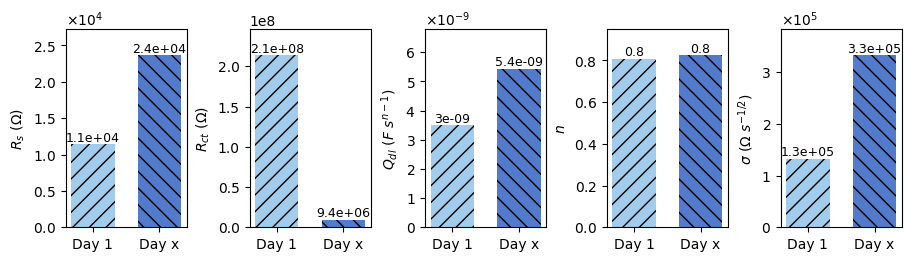

In [25]:
import matplotlib.ticker as mticker

Rs1, Rct1, Qdl1, n1, sigma1 = ecm_params['average']
RsX, RctX, QdlX, nX, sigmaX = ecm_params_dayx['average']

fig, axes = plt.subplots(1, 5, figsize=(9, 2.5), constrained_layout=True)
sci_fmt = mticker.ScalarFormatter(useMathText=True)
sci_fmt.set_scientific(True)
sci_fmt.set_powerlimits((0, 0)) # force scientific for all magnitudes


c1, cX = "#a1cceb", "#4d77caf7"
h1, hX = '//', '\\\\'
text_size = 9
ax = axes[0]
ax.bar(0, Rs1, color=c1, hatch=h1, width=0.65)
ax.bar(1, RsX, color=cX, hatch=hX, width=0.65)
ax.set_xticks([0,1]); ax.set_xticklabels(['Day 1','Day x'])
# ax.set_title(r'$R_s$')
ax.set_ylabel(r'$R_s\  (\Omega)$')
ax.set_ylim(0, max(Rs1, RsX)*1.15)
ax.yaxis.set_major_formatter(sci_fmt) # R_s axis
ax.text(0, Rs1, f'{Rs1:.1e}', ha='center', va='bottom', fontsize=text_size)
ax.text(1, RsX, f'{RsX:.1e}', ha='center', va='bottom', fontsize=text_size)

ax = axes[1]
ax.bar(0, Rct1, color=c1, hatch=h1, width=0.65)
ax.bar(1, RctX, color=cX, hatch=hX, width=0.65)
ax.set_xticks([0,1]); ax.set_xticklabels(['Day 1','Day x'])
# ax.set_title(r'$R_{ct}$')
ax.set_ylabel(r'$R_{ct}\  (\Omega)$')
ax.set_ylim(0, max(Rct1, RctX)*1.15 or 1e-7)
# ax.yaxis.set_major_formatter(sci_fmt)
ax.text(0, Rct1, f'{Rct1:.1e}', ha='center', va='bottom', fontsize=text_size)
ax.text(1, RctX, f'{RctX:.1e}', ha='center', va='bottom', fontsize=text_size)


ax = axes[2]
ax.bar(0, Qdl1, color=c1, hatch=h1, width=0.65)
ax.bar(1, QdlX, color=cX, hatch=hX, width=0.65)
ax.set_xticks([0,1]); ax.set_xticklabels(['Day 1','Day x'])
# ax.set_title(r'$Q_{dl}$')
ax.set_ylabel(r'$Q_{dl} \ (F \ s^{n-1}$)')
ax.set_ylim(0, max(Qdl1, QdlX)*1.25 or 1e-9)
ax.yaxis.set_major_formatter(sci_fmt) 
ax.text(0, Qdl1, f'{Qdl1:.1}', ha='center', va='bottom', fontsize=text_size)
ax.text(1, QdlX, f'{QdlX:.1e}', ha='center', va='bottom', fontsize=text_size)


ax = axes[3]
ax.bar(0, n1, color=c1, hatch=h1, width=0.65)
ax.bar(1, nX, color=cX, hatch=hX, width=0.65)
ax.set_xticks([0,1]); ax.set_xticklabels(['Day 1','Day x'])
# ax.set_title(r'$n$')
ax.set_ylabel(r'$n$')
ax.set_ylim(0, max(n1, nX)*1.15 if max(n1, nX) < 1 else 1.05)
ax.yaxis.set_major_formatter(sci_fmt) 
ax.text(0, n1, f'{n1:.1f}', ha='center', va='bottom', fontsize=text_size)
ax.text(1, nX, f'{nX:.1f}', ha='center', va='bottom', fontsize=text_size)

ax = axes[4]
ax.bar(0, sigma1, color=c1, hatch=h1, width=0.65)
ax.bar(1, sigmaX, color=cX, hatch=hX, width=0.65)
ax.set_xticks([0,1]); ax.set_xticklabels(['Day 1','Day x'])
# ax.set_title(r'$\sigma$')
ax.set_ylabel(r'$\sigma \ (\Omega \ s^{-1/2})$')
ax.set_ylim(0, max(sigma1, sigmaX)*1.15 + 1e-9)
ax.yaxis.set_major_formatter(sci_fmt) 
ax.text(0, sigma1, f'{sigma1:.1e}', ha='center', va='bottom', fontsize=text_size)
ax.text(1, sigmaX, f'{sigmaX:.1e}', ha='center', va='bottom', fontsize=text_size)

handles = [
    plt.Rectangle((0,0),1,1,color=c1,hatch=h1,ec='black',label='Day 1'),
    plt.Rectangle((0,0),1,1,color=cX,hatch=hX,ec='black',label='Day X')
]

# fig.savefig('figs/ecm_params.pdf', dpi=300, bbox_inches='tight')


In [26]:
(0.146 + 0.13 + 0.26 + 0.10)/4
(0.81 + 0.83 + 0.73 + 0.88)/4

0.8125

In [27]:
(22.4 +22.1 + 6.8 + 8.2)/4

14.875